In [1]:
import pandas as pd
import numpy as np

import  geopandas as gpd

import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
chile_pol = gpd.read_file('../shape_chile/chile_pol.shp')
chile_pol.head(2)
# center = chile_pol["the_geom"].iloc[0].centroid()
# chile_pol.rotate(-90, origin=center).plot()

,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry
0,23,03,033,03301,Región de Atacama,Huasco,Vallenar,1,"MULTIPOLYGON (((256460.339 6772212.650, 256469..."
1,81,13,135,13502,Región Metropolitana de Santiago,Melipilla,Alhué,3,"POLYGON ((331429.913 6241438.370, 331480.265 6..."


In [3]:
data_ = pd.read_csv('../Vitamina_D_Visualizacion_26092022.csv', delimiter=';')
data_.head(5)

,FECHA_PETICION,Año,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,"22,87","5,5","10,9","0,9",NaN
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,"15,04",NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,"17,17","4,1","9,6","0,8",NaN
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,"14,44","4,3","9,6","0,6",NaN
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,"15,52",NaN,NaN,"0,66",NaN


In [4]:
data_.LABORATORIO.unique()

array([' SANTIAGO', ' LA SERENA', ' VALDIVIA', ' ANTOFAGASTA',
       ' PUERTO MONTT', ' ILLAPEL', ' RANCAGUA', ' CONCEPCION', ' OVALLE',
       ' LOS ANDES', ' VIÑA DEL MAR', ' VALLENAR', ' TEMUCO', ' COPIAPO',
       ' ARICA', ' CALAMA', ' IQUIQUE', 'TALCA'], dtype=object)

In [5]:
nombres = {
   ' SANTIAGO': 'Región Metropolitana de Santiago',
   ' LA SERENA':'Región de Coquimbo',
   ' VALDIVIA': 'Región de Los Ríos',
   ' ANTOFAGASTA': 'Región de Antofagasta',
   ' PUERTO MONTT': 'Región de Los Lagos',
   ' ILLAPEL':'Región de Coquimbo',
   ' RANCAGUA':"Región del Libertador General Bernardo O'Higgins",
   ' CONCEPCION': 'Región del Biobío',
   ' OVALLE':'Región de Coquimbo',
   ' LOS ANDES': 'Región de Valparaíso',
   ' VIÑA DEL MAR':'Región de Valparaíso',
   ' VALLENAR':'Región de Atacama',
   ' TEMUCO':'Región de La Araucanía',
   ' COPIAPO':'Región de Atacama',
   ' ARICA':'Región de Arica y Parinacota',
   ' CALAMA':'Región de Antofagasta', 
   ' IQUIQUE':'Región de Tarapacá',
   'TALCA': 'Región del Maule'
}
codigos = {
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
}



In [6]:
data_['nom_reg'] = data_.LABORATORIO.map(lambda x: nombres.get(x))
data_['cod_reg'] = data_.LABORATORIO.map(lambda x: codigos.get(x))

In [7]:
center = chile_pol["geometry"].iloc[0].centroid
chile_pol.geometry = chile_pol.rotate(96, origin=center)
chile_pol['centroide'] = chile_pol.geometry.centroid
chile_pol['X']= chile_pol.centroide.x

In [8]:
color=['#C62828', '#C62828', '#283593', '#FF9800', '#283593', '#C62828', '#283593',]

chile_pol['color'] = chile_pol.MacroZona.map(lambda x: color[x-1])

In [9]:
chile_pol.codreg=chile_pol.codreg.astype(int)
index_=[15,1,2,3,4,5,13,6,7,8,9,14,10]
chile_pol.head(2)

,id,codreg,codpro,codcom,nom_reg,nom_pro,nom_com,MacroZona,geometry,centroide,X,color
0,23,3,033,03301,Región de Atacama,Huasco,Vallenar,1,"MULTIPOLYGON (((623767.475 6837422.745, 623769...",POINT (410756.190 6970180.113),4.107562e+05,#C62828
1,81,13,135,13502,Región Metropolitana de Santiago,Melipilla,Alhué,3,"POLYGON ((1143797.664 6967462.648, 1143828.872...",POINT (1103086.825 6980848.607),1.103087e+06,#283593


In [ ]:
## Macrozona:
## 3 (norte) hasta coquimbo
## Valparaiso - Rancagua Centro
## Sur de Maule PTO Montt
#  

In [ ]:
chile_pol.MacroZona

In [ ]:
index_

In [10]:
data_['VITAMINA D'] = data_['VITAMINA D'].map(lambda x: float(x.replace(',','.')))

In [12]:
data__ = data_.pivot_table(index='nom_reg',columns='Año', values='VITAMINA D', aggfunc={'VITAMINA D':np.mean}).reset_index().set_index('nom_reg')
data__ = pd.merge(data__, chile_pol[['nom_reg','codreg','X']], how='left', left_on='nom_reg', right_on='nom_reg')
# data__ = data__.loc[index_,:]
# data__

In [13]:
data__=data__.set_index('codreg')
data__=data__.loc[index_,:]
data__

,nom_reg,2018,2019,2020,2021,X
codreg,,,,,,
15,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833,-5.708535e+05
1,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640,-3.846176e+05
2,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813,-2.287905e+04
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199,4.107562e+05
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693,7.764741e+05
5,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084,1.016249e+06
13,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218,1.103087e+06
6,Región del Libertador General Bernardo O'Higgins,22.240534,22.671343,20.666957,19.724457,1.199376e+06
7,Región del Maule,16.514118,22.581705,20.957959,19.520841,1.334371e+06


In [16]:
data__.mean()

/tmp/ipykernel_279310/1973510546.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data__.mean()


2018        20.432093
2019        23.163596
2020        21.782418
2021        19.956296
X       921436.882519
dtype: float64

In [124]:
data__

,nom_reg,2018,2019,2020,2021,X
codreg,,,,,,
15,Región de Arica y Parinacota,23.444603,25.524146,23.285820,20.840833,-5.708535e+05
1,Región de Tarapacá,23.923333,25.680573,23.034352,19.971640,-3.846176e+05
2,Región de Antofagasta,21.371263,23.512016,23.639528,20.656813,-2.287905e+04
3,Región de Atacama,21.002618,23.927678,22.627952,19.958199,4.107562e+05
4,Región de Coquimbo,21.332613,24.186933,22.366996,20.061693,7.764741e+05
5,Región de Valparaíso,19.660351,23.068020,21.931047,20.093084,1.016249e+06
13,Región Metropolitana de Santiago,21.165394,23.952148,22.331422,20.970218,1.103087e+06
6,Región del Libertador General Bernardo O'Higgins,22.240534,22.671343,20.666957,19.724457,1.199376e+06
7,Región del Maule,16.514118,22.581705,20.957959,19.520841,1.334371e+06


In [130]:
data_plot =data__[['X',2018,2019,2020,2021]].set_index('X').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

In [21]:
# data_plot = data__.set_index('nom_reg').unstack().reset_index().rename(columns={'level_0':'Año',0:'Promedio'})

In [134]:
# data_plot

In [132]:
data_plot = pd.merge(
    left = data_plot,
    right = chile_pol[['X','Y']],
    left_on = 'X',
    right_on= 'X',
    how='left'
)

In [133]:
data_plot

,Año,X,Promedio,Y
0,2018,-5.708535e+05,23.444603,6.890056e+06
1,2018,-3.846176e+05,23.923333,6.935037e+06
2,2018,-2.287905e+04,21.371263,7.002532e+06
3,2018,4.107562e+05,21.002618,6.970180e+06
4,2018,7.764741e+05,21.332613,6.919198e+06
5,2018,1.016249e+06,19.660351,6.939177e+06
6,2018,1.103087e+06,21.165394,6.980849e+06
7,2018,1.199376e+06,22.240534,6.953717e+06
8,2018,1.334371e+06,16.514118,6.934244e+06
9,2018,1.552545e+06,18.254745,6.878078e+06


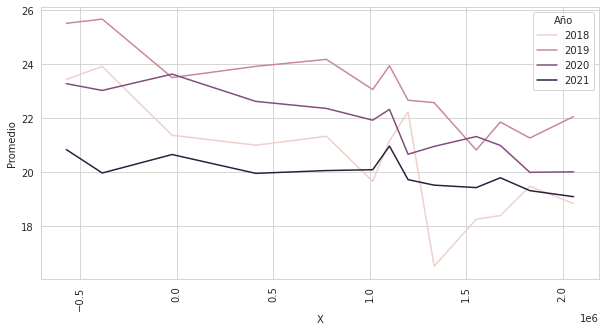

In [136]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año'
)
ax.tick_params(axis='x', rotation=90)



In [138]:
color_anios = ['#b69797','#c97272','#a45050','#e6d089']

In [150]:
data_plot[data_plot['Año']==2021][['X','Y']]

,X,Y
39,-5.708535e+05,6.890056e+06
40,-3.846176e+05,6.935037e+06
41,-2.287905e+04,7.002532e+06
42,4.107562e+05,6.970180e+06
43,7.764741e+05,6.919198e+06
44,1.016249e+06,6.939177e+06
45,1.103087e+06,6.980849e+06
46,1.199376e+06,6.953717e+06
47,1.334371e+06,6.934244e+06
48,1.552545e+06,6.878078e+06


/home/fguzman/miniconda3/envs/mdd/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


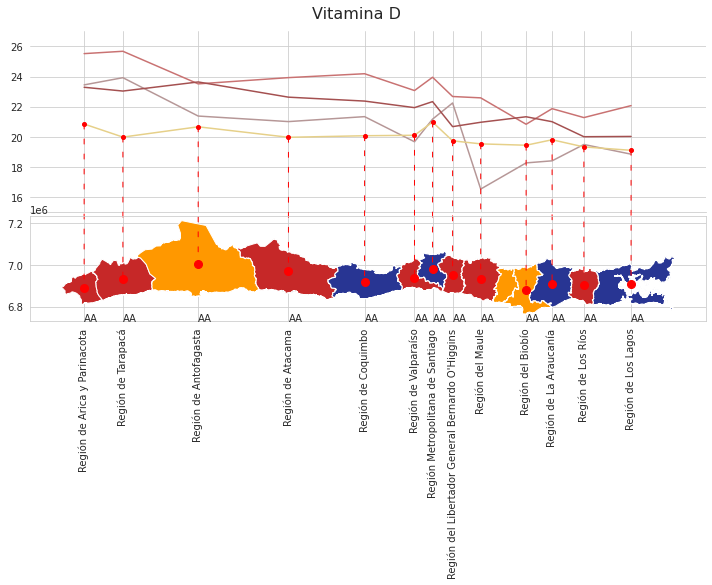

6732454.265839104


In [227]:
from matplotlib.patches import ConnectionPatch
fig, ax = plt.subplots(2,1, figsize=(10,8), sharex='all')
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
fig.suptitle("Vitamina D", fontsize=16)
ax[0]=sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año',
    ax=ax[0],
    markers=False,
    dashes=False,
    style='Año',
    palette=color_anios,
    legend=False
    # axis='x', rotation=90
    
)

# ax[0].tick_params(axis='x', rotation=90)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set(ylabel=None)
ax[0].set(xlabel=None)

# pltk.legend(loc='upper right')

chile_pol[~chile_pol['codreg'].isin([12,11])].plot(column='MacroZona', 
    #categorical=True,
    ax=ax[1],
    color=chile_pol['color'],
    
    legend=False,
)
for xpy in zip(data_plot[data_plot['Año']==2021]['X'],data_plot[data_plot['Año']==2021]['Promedio'],data_plot[data_plot['Año']==2021]['Y']):
    # print(xpy)
    ax[0].plot(xpy[0],xpy[1],'ro',markersize=4)   
    ax[1].plot(xpy[0],xpy[2],'ro',markersize=8)   
    ax[1].text(xpy[0],6732454.265839104,s='AA')
    con = ConnectionPatch(xyA=(xpy[0],xpy[1]), xyB=(xpy[0],xpy[2]), coordsA="data", coordsB="data",
          axesA=ax[0], axesB=ax[1], color="red", linestyle=(0, (5, 10)))
    ax[1].add_artist(con)


# ax1.plot(x[i],y[i],'ro',markersize=10)
# ax2.plot(x[i],y[i],'ro',markersize=10)
ax[0].set_ylim(15,27)
# ax[1].set_ylim(0,10)
y_limin,ylimax= ax[1].get_ylim()
ax[1].set_ylim(y_limin-1,ylimax)
plt.xticks(x_,data__.nom_reg.to_list())
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
print(y_limin-1)

In [74]:
chile_pol['Y']=chile_pol.centroide.y

In [76]:
chile_pol[['nom_reg', 'codreg', 'X','Y']]

,nom_reg,codreg,X,Y
0,Región de Atacama,3,4.107562e+05,6.970180e+06
1,Región Metropolitana de Santiago,13,1.103087e+06,6.980849e+06
2,Región de Los Lagos,10,2.056743e+06,6.908509e+06
3,Región de Arica y Parinacota,15,-5.708535e+05,6.890056e+06
4,Región de La Araucanía,9,1.677371e+06,6.906367e+06
5,Región del General Carlos Ibañez del Campo,11,2.539909e+06,6.955821e+06
6,Región de Tarapacá,1,-3.846176e+05,6.935037e+06
7,Región de Valparaíso,5,1.016249e+06,6.939177e+06
8,Región de Los Ríos,14,1.830057e+06,6.902150e+06
9,Región de Coquimbo,4,7.764741e+05,6.919198e+06


In [79]:
chile_pol[chile_pol.codreg==1].Y.astype(float).round(2)

6    6935037.4
Name: Y, dtype: float64

In [ ]:
-384617.5576065051,

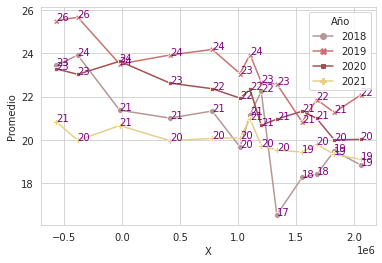

In [58]:

sns.lineplot(
    data= data_plot,
    x='X',
    y='Promedio',
    hue='Año',
    # ax=ax[0],
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios
    # axis='x', rotation=90
    
)
# label points on the plot
for x, y in zip(data_plot['X'], data_plot['Promedio']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
#  y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
 y = y,
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'purple') # set colour of line

In [49]:
data_plot.X.unique()

array([-570853.53558952, -384617.55760651,  -22879.04794623,
        410756.19037928,  776474.07212535, 1016248.85197903,
       1103086.82483044, 1199375.58686655, 1334371.153405  ,
       1552545.47126454, 1677371.20971979, 1830057.02785888,
       2056743.22545494])

In [ ]:
chile_pol[['codreg','X','nom_reg']]

In [ ]:
sns.lineplot(
    data= data_plot,
    x='cod_reg',
    y='Promedio',
    hue='Año',
    
    markers=True,
    dashes=False,
    style='Año',
    palette=color_anios,

    
)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
chile_pol.plot(ax=ax)
chile_pol['centroide'].plot(ax=ax, color='red')


     A  N  P
1  0.0  1  0
2  1.0  0  1
3  1.0  0  1
      A  N  P
4   1.0  2  1
5   2.0  1  2
6   2.0  1  1
7   3.0  2  1
8   2.0  3  1
9   3.0  3  2
10  NaN  3  3
11  NaN  3  3
12  NaN  3  3


([<matplotlib.axis.YTick at 0x7fba9e511930>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

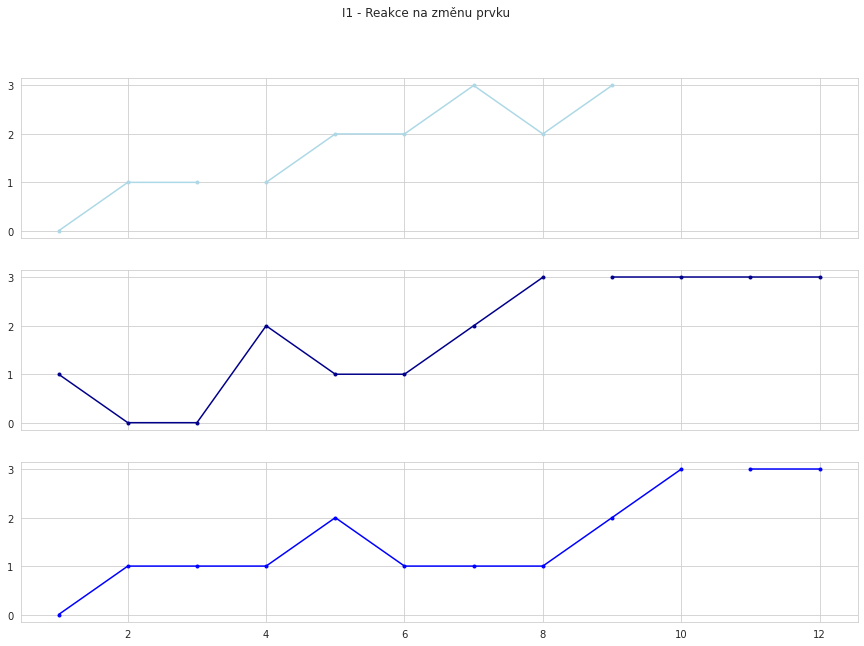

In [53]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

y = np.array([0,1,2,3,4])

## recreate your data
df = pd.DataFrame({
    'A':[0, 1, 1, 1, 2, 2, 3, 2, 3] + [float("nan")]*3,
    'N':[1, 0, 0, 2, 1, 1, 2, 3, 3, 3, 3, 3],
    'P':[0, 1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3],
    },  
    index=range(1,13)
)

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle("I1 - Reakce na změnu prvku")

## create a gap in the line
axs[0].plot(df.index[0:3],df['A'][0:3], color='lightblue', label="A", marker='.')
print(df.iloc[:3,:])
axs[0].plot(df.index[3:12],df['A'][3:12], color='lightblue', label="A", marker='.')
print(df.iloc[3:12,:])
## create a gap in the line
axs[1].plot(df.index[0:8],df['N'][0:8], color='darkblue', label="N", marker='.')
axs[1].plot(df.index[8:12],df['N'][8:12], color='darkblue', label="N", marker='.')

## create a gap in the line
axs[2].plot(df.index[0:10],df['P'][0:10], color='blue', label="P", marker='.')
axs[2].plot(df.index[10:12],df['P'][10:12], color='blue', label="P", marker='.')

plt.yticks(np.arange(y.min(), y.max(), 1))


In [ ]:
df

[0.02074729 0.86961052 0.03764837 0.83159278 0.05092761 0.07322597
 0.66064612 0.02330326 0.79924383 0.31302809 0.31438083 0.91541646
 0.98975151 0.19326529 0.44515421 0.92180354 0.55941092 0.04231914
 0.21350243 0.53073116 0.6528164  0.70038182 0.11649022 0.76274015
 0.03615075 0.16584318 0.94372307 0.08553293 0.41159631 0.55445687
 0.67020019 0.42596293 0.47042535 0.36047996 0.41813885 0.12965289
 0.86279264 0.22679279 0.30456233 0.18447819 0.26089439 0.00588778
 0.21855985 0.14163807 0.57089991 0.856122   0.16334116 0.81813408
 0.1234633  0.23690925 0.49708997 0.20906237 0.9562964  0.50586187
 0.53151182 0.25520501 0.64894324 0.11127622 0.60092356 0.82640439
 0.42016008 0.87616264 0.50643861 0.02752661 0.20155852 0.74946301
 0.02722282 0.44908672 0.59973217 0.92736976 0.59375837 0.72273627
 0.13449185 0.19431234 0.39151324 0.21447108 0.57201464 0.38808986
 0.11978437 0.41799804 0.1170567  0.45172465 0.53428794 0.82907761
 0.95405925 0.06478427 0.31780316 0.65083635 0.86250002 0.8965

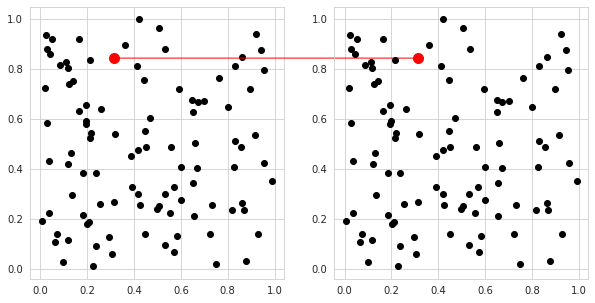

In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x,y = np.random.rand(100),np.random.rand(100)
print(x)
print('------------')
print(y)
print('------------')
xy = (x[1],y[1])
print (xy)
ax1.plot(x,y,'ko')
ax2.plot(x,y,'ko')

i = 10
xy = (x[i],y[i])
con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="red")|
ax2.add_artist(con)

ax1.plot(x[i],y[i],'ro',markersize=10)
ax2.plot(x[i],y[i],'ro',markersize=10)


plt.show()
